Iniciamos importando as bibliotecas que utilizaremos para tratamento de dados e plotagem dos gráficos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Aqui importaremos o csv com os dados que queremos analisar, e iremos imprimir um cabeçalho contendo 5 linhas, para que possa ser possível visualizar o modelo da tabela que estamos importando

In [2]:
df = pd.read_csv('./archive/covid.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


Primeiramente, vamos descobrir qual é a média, a mediana e a moda das idades das pessoas cadastradas no database.

In [3]:
print("Média: " + str(df['AGE'].mean()))
print("Mediana: " + str(df['AGE'].median()))
print("Moda: " + str(df['AGE'].mode()))

Média: 41.794102472403026
Mediana: 40.0
Moda: 0    30
Name: AGE, dtype: int64


Com isso, é possível observar que a média das idades é 41, que a mediana é 40, e a idade que mais aparece é 30 anos. Isso significa que a amostra possui dados muito variados e abrangentes, considerando que a média de vida de uma pessoa seja 80 anos, a média de idades da amostra condiz com isso, e isso demonstra que o que estamos analisando não é um database nichado, por exemplo: se a média de idades fosse 20 anos, provavelmente seria um database de como a covid-19 age nos jovens, assim, se a média fosse 65, como ela age nos idosos, etc.

Agora, iremos substituir os valores 2 da coluna por 0. Na descrição do database, os autores citam que o número 2 foi considerado como um 0 booleano. Para evitar confusões, iremos substituir os números dois de todas as colunas booleanas para 0. Assim, conseguiremos manter o pensamento booleano limpo para analisar os dados

In [5]:
palavras = ['INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

for palavra in palavras:
    df[palavra].replace(2, 0, inplace=True)

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,0,0,...,0,0,1,0,0,0,0,0,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,0,...,0,0,1,0,0,1,1,0,5,97
2,2,1,2,2,09/06/2020,1,0,55,97,1,...,0,0,0,0,0,0,0,0,3,2
3,2,1,1,1,12/06/2020,97,0,53,0,0,...,0,0,0,0,0,0,0,0,7,97
4,2,1,2,1,21/06/2020,97,0,68,97,1,...,0,0,1,0,0,0,0,0,3,97


Na descrição do database, os autores citam também que os valores de 97 a 99 indicam dados faltantes. Portanto, vamos substituir todos os esses valores nas colunas booleanas por NA, assim ficará intuitivo que o valor não se aplica à aquela coluna daquela linha.

In [6]:
valores_a_trocar = {97: "NA", 98: "NA", 99: "NA"}

for palavra in palavras:
    df[palavra].replace(valores_a_trocar, inplace=True)

len(df)


1048575

Além disso, na descrição do database é afirmado que a classificação final significa se o paciente foi diagnosticado com covid (1-3) ou se não foi diagnosticado ou se o teste foi inconclusivo (>4), portanto, vamos filtrar o dataframe para considerar apenas os pacientes realmente diagnosticados, limpando assim o dataset e previnindo análises erradas.

In [7]:
df = df[df['CLASIFFICATION_FINAL'] < 4]
len(df)

391979

Com os dados limpos e claros, temos 391979 tuplas consistentes, e com elas podemos iniciar nossas modelagens a fim de analisar diferentes dados e compará-los para encontrar padrões.

Primeiramente, vamos identificar qual a média de pacientes que foram entubados baseados em sua idade, para sabermos qual idade foi a que mais necessitou ser entubada. Faremos essa análise através de um histograma

Também antes de iniciar a criação dos artigos visuais, iremos substituir as datas de óbito por 1, e pessoas que não morreram, receberam 0 no valor da data. Com isso, conseguiremos um valor booleano relacionado à morte da pessoa, já que a data em que ela faleceu não é importante para a análise em foco (A data será utilizada em um próxima análise)

In [8]:
df_intubed = df[['AGE', 'INTUBED', 'DATE_DIED']]

Retiraremos a seguir, os dados faltantes das colunas INTUBED e AGE, para que possamos trabalhar com tuplas completas, e maximinar nossa precisão

In [9]:
df_intubed = df_intubed.query("AGE != 'NA'")
df_intubed = df_intubed.query("INTUBED == 1")

Com isso, é possível gerar o histograma abaixo:

array([[<Axes: title={'center': 'AGE'}>]], dtype=object)

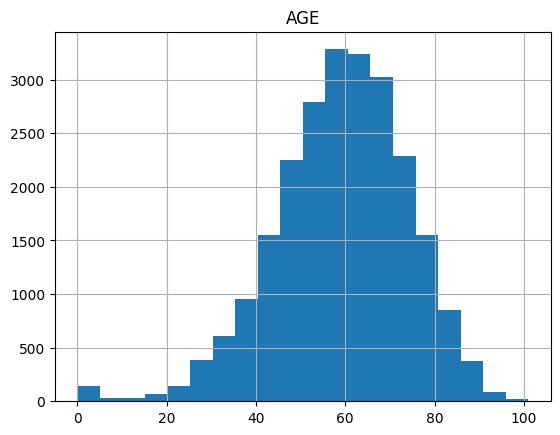

In [10]:
df_intubed.hist(column="AGE", bins=20)

Após analisar o histograma, fica evidente que o maior público que necessitou de internação está entre os 45 e 75 anos. Porém, isso nos dá a falsa informação de que pessoas mais velhas ou mais novas não necessitaram ser internadas. Portanto, vamos considerar mais uma informação no próximo histograma: pessoas que foram internadas porém sobreviveram. Assim, excluiremos o público que faleceu antes mesmo da internação (pessoas de idade mais avançada)

array([[<Axes: title={'center': 'AGE'}>]], dtype=object)

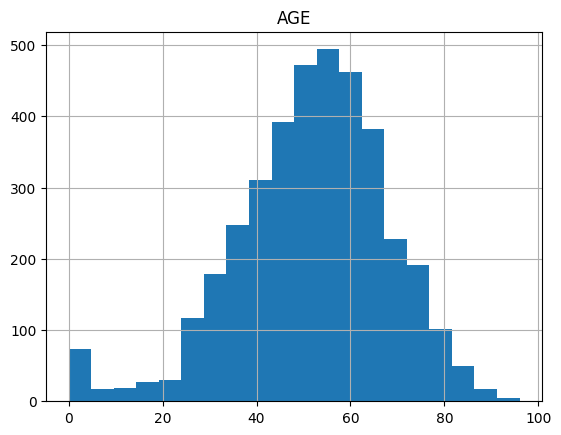

In [13]:
df_intubed_survived = df_intubed.query("DATE_DIED == '9999-99-99'")
df_intubed_survived.hist(column='AGE', bins=20)

Apesar da mudança no histograma ser quase imperceptível, o segundo é mais preciso, já que contém somente as internações de pessoas que se recuperaram da covid após serem internadas. Abaixo exibiremos um gráfico de linhas que demonstra a diferença entre os dois públicos

In [14]:
df_intubed_alive = df_intubed[df_intubed["DATE_DIED"] == 1]
df_intubed_dead = df_intubed[df_intubed["DATE_DIED"] == 0]
df2 = pd.crosstab(df_intubed_alive['AGE'], df_intubed_alive['DATE_DIED'])
df3 = pd.crosstab(df_intubed_dead['AGE'], df_intubed_dead['DATE_DIED'])

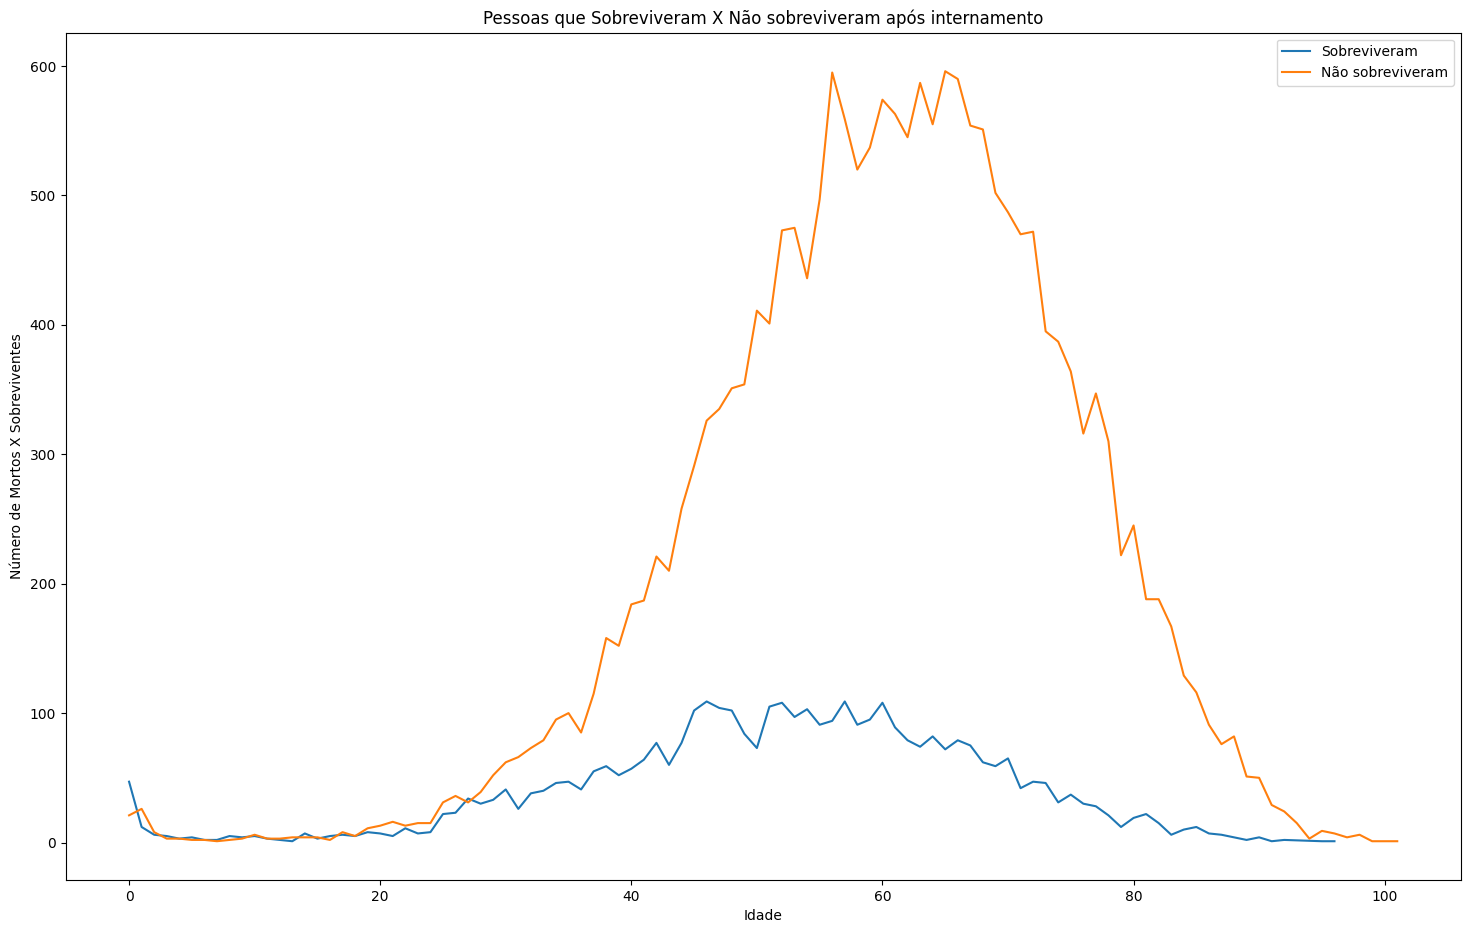

In [339]:

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [18,10]
plt.title('Pessoas que Sobreviveram X Não sobreviveram após internamento')
plt.xlabel('Idade')
plt.ylabel('Número de Mortos X Sobreviventes')
ax.plot(df2, label='Sobreviveram')
ax.plot(df3, label='Não sobreviveram')
ax.legend()
plt.show()

Um dado importante é o número de mortes por ano. Na teoria o número é baixo em 2020, já que a pandemia começou no final do ano, atinge seu pico em 2021 e início de 2022, e no ano de 2023 elas diminuem. Vamos plotar um gráfico de barras indicando o número de mortes por ano, porém, é notável que no dataset só há dados de 2020 e 2021, portanto a comparação será entre os dois anos.

In [15]:
def simply_data(date):
    if '2020' in date:
        return 2020
    elif '2021' in date:
        return 2021

[]

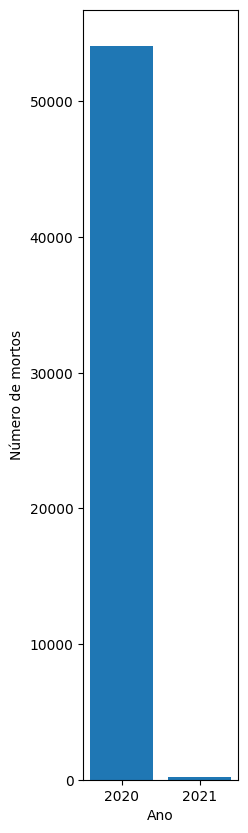

In [16]:
df_morteAnos = df.query("DATE_DIED != '9999-99-99'")
df_morteAnos = df_morteAnos["DATE_DIED"].apply(simply_data)
df_morteAnos = pd.DataFrame(df_morteAnos)
df_morteAnos
plt.rcParams['figure.figsize'] = [2, 10]
df_morteAnos = df_morteAnos.groupby('DATE_DIED')
counts = df_morteAnos.size()
plt.bar(counts.index, counts)

# Adiciona legenda
plt.xlabel("Ano")
plt.ylabel("Número de mortos")
plt.plot()


O resultado inesperado do gráfico acima levanta uma hipótese: o levantamento dos dados foi realizado durante 2020 (início da pandemia) e foi finalizado no início de 2021. Isso justifica o alto número de mortos em 2020, e o baixo número em 2021, já que pela lógica a covid-19 fez mais vítimas em 2021 do que em 2020. Portanto, o resultado do gráfico acima não é satisfatório, mas cabe como um bom exemplo de que a análise crítica é essêncial em todos os momentos de uma pesquisa e preparação de dados

A partir de agora, a análise será focada no impacto do coronavírus em pessoas que possuem doenças, e qual o impacto delas na recuperação do paciente. Para isso, analisaremos doença por doença, comparando a taxa de sobrevivência e de óbitos entre pessoas que possuiam a doença, contrastando assim, as doenças que se tornaram pontos críticos para resultarem em fatalidade dos pacientes.

A primeira doença a ser analisada, será na verdade um conjunto de doenças respiratórias: Asma e Pneumonia. Devido a fragilizar o sistema respiratório, alvo principal do covid-19, estas doenças tendem a degradar os casos dos pacientes que as detém, aumentando o número de internados e óbitos. Portanto, montaremos um gráfico de pizza que ilustra o número de sobreviventes X número de óbitos do público que continha as doenças

In [25]:
df_disease = df[(df['ASTHMA'] == 1) | (df['PNEUMONIA'] == 1)]

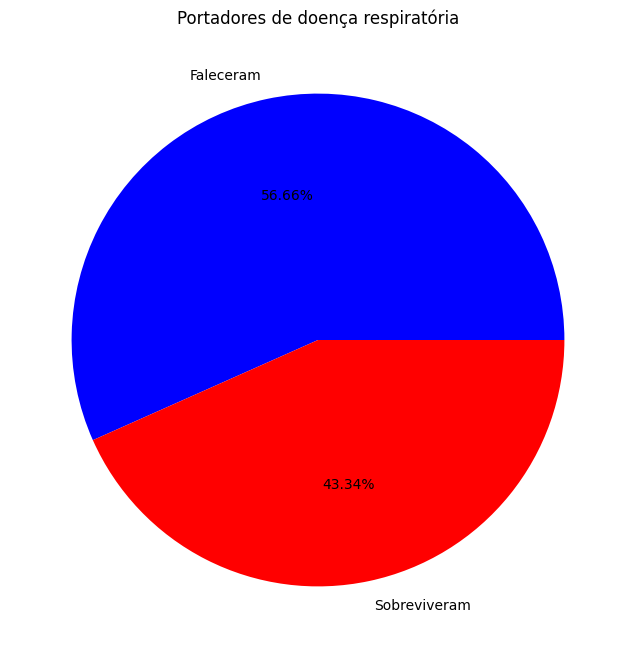

In [59]:
plt.rcParams['figure.figsize'] = [10, 8]
mortos = df_disease['DATE_DIED'].value_counts()['9999-99-99']
vivos = len(df_disease) - mortos
plt.title("Portadores de doença respiratória")
plt.pie([mortos, vivos], labels=["Faleceram", "Sobreviveram"], colors=["blue", "red"], autopct="%.2f%%",)  
plt.show()


Analisando o gráfico, podemos notar que mais de 55% das pessoas portadoras de doenças respiratórias faleceram, enquanto os outros 43% sobreviveram. Ou seja, o número de fatalidades é maior no público que continha doenças que afetavam o sistema respiratório, indicando um ponto de atenção para a Saúde Pública.

Outro público frágil é o de portadores de doenças cardiovasculares e hipertensos. Por isso, faremos a mesma análise para esse público, destacando o número de mortos do de sobreviventes, e entendendo como a doença agrava estas doenças

In [60]:
df_disease = df[(df['HIPERTENSION'] == 1) | (df['CARDIOVASCULAR'] == 1)]

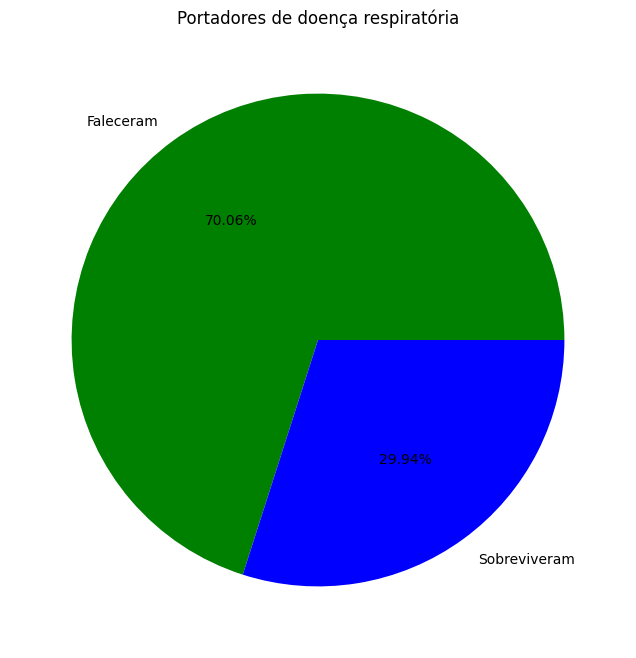

In [63]:
plt.rcParams['figure.figsize'] = [10, 8]
mortos = df_disease['DATE_DIED'].value_counts()['9999-99-99']
vivos = len(df_disease) - mortos
plt.title("Portadores de doença respiratória")
plt.pie([mortos, vivos], labels=["Faleceram", "Sobreviveram"], colors=["GREEN", "BLUE"], autopct="%.2f%%",)  
plt.show()


É notável a diferença exibida pelo gráfico em relação ao número de sobreviventes portadores de doenças cardiovasculares. Cerca de 70% dos portadores vieram a óbito, enquanto outros 30% sobreviveram. Isso indica um enorme agravante para pessoas que continham doenças cardiovasculares, e exige um maior cuidado com este público.